In [8]:
from keras.datasets import cifar10
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()


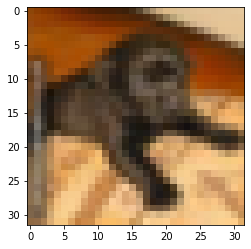

In [10]:
#Visualizing The Dataset
single_image = x_train[56]
plt.imshow(single_image)
plt.show()

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
single_image = x_train[56]
single_image

array([[[141,  70,   8],
        [139,  61,   2],
        [136,  55,   0],
        ...,
        [228, 198, 155],
        [228, 199, 156],
        [229, 200, 157]],

       [[148,  71,  10],
        [150,  67,   5],
        [148,  64,   2],
        ...,
        [228, 197, 153],
        [228, 196, 152],
        [228, 197, 153]],

       [[149,  72,  17],
        [149,  66,   7],
        [148,  64,   4],
        ...,
        [230, 197, 151],
        [229, 197, 151],
        [229, 197, 151]],

       ...,

       [[125, 100,  73],
        [124, 102,  80],
        [139, 110,  75],
        ...,
        [220, 169, 109],
        [199, 143,  86],
        [208, 149,  93]],

       [[126, 101,  75],
        [116,  93,  71],
        [135, 107,  73],
        ...,
        [246, 205, 144],
        [226, 181, 121],
        [196, 145,  87]],

       [[143, 105,  67],
        [145, 107,  71],
        [169, 127,  83],
        ...,
        [254, 208, 141],
        [255, 206, 138],
        [227, 174, 105]]

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_example = to_categorical(y_train)

In [17]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_example.shape

(50000, 10)

In [19]:
y_cat_train = to_categorical(y_train,10)

In [20]:
y_cat_test = to_categorical(y_test,10)

In [21]:
single_image.max()

255

In [22]:
single_image.min()

0

In [23]:
x_train= x_train/255
x_test =x_test/255

In [24]:
scaled_image = x_train[0]

In [25]:
scaled_image.max()

1.0

In [26]:
scaled_image.min()

0.0

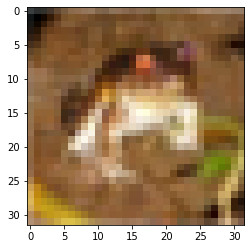

In [27]:
plt.imshow(scaled_image)

In [28]:
x_train = x_train.reshape(50000, 32, 32, 3)

Original x_train shape: (50000, 32, 32, 3)
Reshaped x_train shape: (50000, 32, 32, 3)


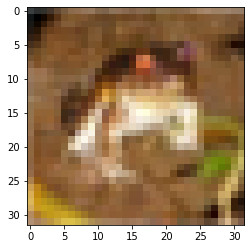

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Print the shape before reshaping
print("Original x_train shape:", x_train.shape)

# Correct the reshape operation
x_train = x_train.reshape(50000, 32, 32, 3)

# Print the shape after reshaping
print("Reshaped x_train shape:", x_train.shape)

# Continue with your code...

# For example, printing the first scaled image
scaled_image = x_train[0]
plt.imshow(scaled_image)
plt.show()

In [30]:
import numpy as np


In [31]:
x_train = x_train.reshape(-1, 32, 32, 3)  # -1 infers the number of samples from the data
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [32]:
# 2. One-Hot Encode Labels
y_cat_train = to_categorical(y_train, 10)  
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [43]:

model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape= (32,32,3), activation='relu'))

model.add(MaxPool2D(pool_size=(3,3)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

# Compile the model

In [44]:
# Compile the model (add optimizer, loss, and metrics)
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               819456    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 822922 (3.14 MB)
Trainable params: 822922 (3.14 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

# Train Our Model

In [48]:
model.fit(x_train, y_cat_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6668 - accuracy: 0.7667
Epoch 2/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5946 - accuracy: 0.7924
Epoch 3/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5225 - accuracy: 0.8178
Epoch 4/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4622 - accuracy: 0.8389
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3967 - accuracy: 0.8626
Epoch 6/15
1563/1563 [==============================] - 23s 14ms/step - loss: 0.3453 - accuracy: 0.8793
Epoch 7/15
1563/1563 [==============================] - 23s 14ms/step - loss: 0.2904 - accuracy: 0.8996
Epoch 8/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2469 - accuracy: 0.9150
Epoch 9/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2048 - accuracy: 0.9306
Epoch 10/15
1563/1563 [==============================] - 23s 15m

In [49]:
model.metrics_names

['loss', 'accuracy']

# Evaluating The Model


In [51]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.9966 - accuracy: 0.6660


[1.9966033697128296, 0.6660000085830688]

In [52]:
from sklearn.metrics import classification_report 

In [53]:
import numpy as np

In [54]:
predictions = model.predict(x_test)
prediction_classes= np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 4ms/step


# Generating Report

In [55]:
report =classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1000
           1       0.76      0.77      0.77      1000
           2       0.58      0.53      0.56      1000
           3       0.48      0.46      0.47      1000
           4       0.57      0.65      0.60      1000
           5       0.58      0.55      0.56      1000
           6       0.75      0.73      0.74      1000
           7       0.77      0.69      0.73      1000
           8       0.80      0.77      0.78      1000
           9       0.69      0.78      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

